# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [6]:
# Load packages
import pickle
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [3]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

n_valid = len(X_valid)
# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

26


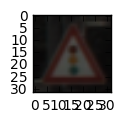

In [10]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

<Container object of 43 artists>

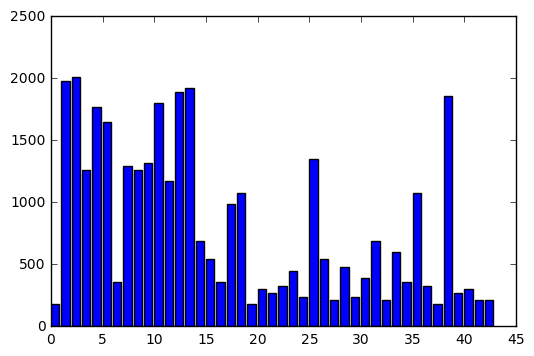

In [9]:
#Number of samples per label
def count_of_labels(x, labels):
    count=[]
    for i in range(labels):
        count.append(np.sum(x == i))
    return count

plt.bar(range(43), count_of_labels(y_train, 43))

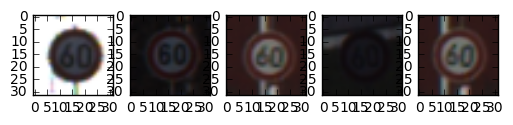

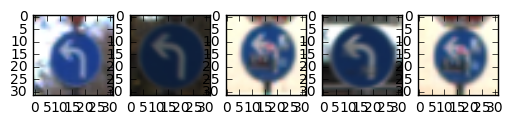

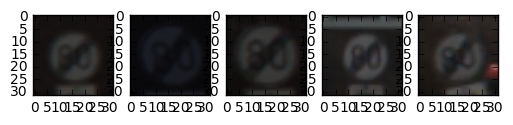

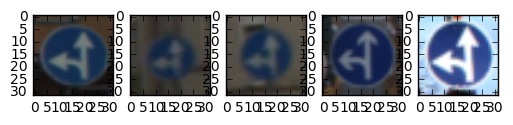

In [13]:
#Image visualization for each label and operations that can be done for data augmentation

def dataset_visualization(i):
    index = np.where(y_train==i)
    img, (x0,x1,x2,x3,x4) = plt.subplots(1,5)
    inx= np.random.randint(np.min(index),np.max(index), size=5)

    x0.imshow(X_train[inx[0]], cmap = "gray")
    x1.imshow(X_train[inx[1]], cmap = "gray")
    x2.imshow(X_train[inx[2]], cmap = "gray")
    x3.imshow(X_train[inx[3]], cmap = "gray")
    x4.imshow(X_train[inx[4]], cmap = "gray")

dataset_visualization(3)
dataset_visualization(34)
dataset_visualization(6)
dataset_visualization(37)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [16]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#RGB to Gray Function Definition
def rgb2gray(x):
    shape = list(x.shape)
    shape[3] = 1
    y = np.ndarray(shape = shape, dtype = 'float32')
    for img in np.arange(len(x)):
            y[img,:,:,0] = cv2.cvtColor(x[img], cv2.COLOR_BGR2GRAY)
    return y


#Degree Transform Function Definition
def degree_transforms(img, degrees):
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),degrees,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

#Affine Transform Function Definition
def affine_transform(img):
    rows, cols = img.shape
    
    pts1 = np.float32([[5,5],[25,5],[5,25]])
    pts2 = np.float32([[8,8],[22,5],[8,27]])

    a = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,a,(cols,rows))
    return dst

#Data Augmentation Function Definition
def data_augmentation(cla, sample_degrees, min_degree, max_degree):
    x=np.empty(shape= (32,32))
    y=[]
    index=np.random.randint(np.min(np.where(y_train==cla)),np.max(np.where(y_train==cla)), size=2)
    degrees = np.random.randint(min_degree,max_degree,size=sample_degrees)
    #print(degrees)
    for j in index:
        for k in degrees:
            x = np.dstack((x, degree_transforms(affine_transform(X_train[j]),k)))
            y = np.append(y,cla)
    
    if x.shape[2]!= len(y):
        x = np.array(x[:,:,1:])
        #x = x[:,:,:,np.newaxis]
    x = np.rollaxis(x, 2,0)
    
    return x , y

In [ ]:
#RGB to Grayscale
X_train = rgb2gray(X_train)
X_train= X_train.squeeze()

X_valid = rgb2gray(X_valid)
X_valid = X_valid.squeeze()

X_test = rgb2gray(X_test)
X_test = X_test.squeeze()

In [ ]:
#Data Augmentation
count = count_of_labels(y_train, 43)

for z in range(43):
    number = int((2500-count[z])/2)
    if z>=36 & z<40:
        x, y = data_augmentation(z, number, -20,20)
    else:
        x, y = data_augmentation(z, number, -35,35)
    X_train = np.concatenate((X_train, x))
    y_train = np.concatenate((y_train, y))


(107499, 32, 32, 1) (107499,)
5570 3.0


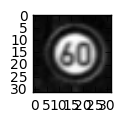

In [238]:
print(X_train.shape, y_train.shape)
index = int(np.random.randint(low= 0, high=X_train.shape[0], size = 1))
print(index, y_train[index])
plt.figure(figsize=(1,1))
plt.imshow(X_train[index,:,:,0],cmap="gray")

(107499, 32, 32, 1) (107499,)
88373 33.0


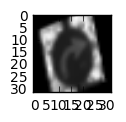

In [9]:
#Checking Augmented Data
print(X_train.shape, y_train.shape)
index = int(np.random.randint(low= 0, high=X_train.shape[0], size = 1))
print(index, y_train[index])
plt.figure(figsize=(1,1))
plt.imshow(X_train[index,:,:,0],cmap="gray")

<Container object of 43 artists>

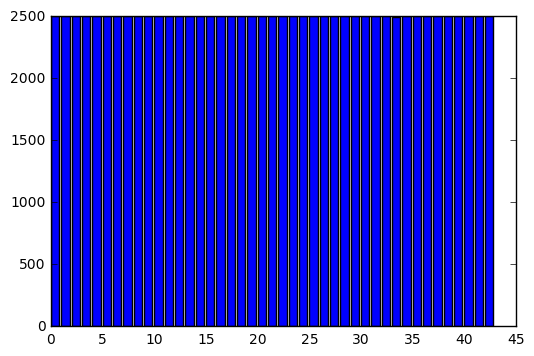

In [19]:
#Count of labels of augmented data
count_aug = count_of_labels(y_train, 43)

plt.bar(range(43), count_aug)

In [ ]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]
X_valid = X_valid[:,:,:,np.newaxis]

In [ ]:
#Saving the grayscale, augmented, transformed data so that these steps need be repeated between sessions
XGN_train = {}
XGN_test = {}
XGN_valid = {}
XGN_train['features'] = X_train
XGN_test['features'] = X_test
XGN_valid['features']= X_valid
XGN_train['labels'] = y_train
XGN_test['labels'] = y_test
XGN_valid['labels'] = y_valid

In [ ]:
#Saving the grayscale images so that they can be imported directly in next session
with open('XGN_train.p', 'wb') as f:
    pickle.dump(XGN_train, f)
with open('XGN_test.p', 'wb') as f:
    pickle.dump(XGN_test, f)
with open('XGN_valid.p', 'wb') as f:
    pickle.dump(XGN_valid, f)

In [2]:
#Loading of grayscale, augmented, transformed data
with open('XGN_train.p', 'rb') as f:
        train_l = pickle.load(f)
with open('XGN_test.p', 'rb') as f:
        test_l = pickle.load(f)
with open('XGN_valid.p', 'rb') as f:
        valid_l = pickle.load(f)
print("Data Loaded! Full throttle ")

Data Loaded! Full throttle 


In [3]:
X_train = train_l['features']
y_train = train_l['labels']
X_test = test_l['features']
y_test = test_l['labels']
X_valid = valid_l['features']
y_valid = valid_l['labels']

In [4]:
X_train=X_train.astype(dtype=np.float32)
X_valid=X_valid.astype(dtype=np.float32)
X_test=X_test.astype(dtype=np.float32)
print("Conversion to float32 done!")

Conversion to float32 done!


### Model Architecture

In [5]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def TrafficNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1a: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1a_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean = mu, stddev = sigma))
    conv1a_b = tf.Variable(tf.zeros(6))
    conv1a = tf.nn.conv2d(x,conv1a_w,strides= [1,1,1,1],padding = 'VALID') + conv1a_b
    
    #ReLU Activation.
    conv1a = tf.nn.relu(conv1a)
    
    #Layer 1b: Convolutional. Input = 32x32x1. Output = 30x30x6.
    conv1b_w = tf.Variable(tf.truncated_normal(shape=(3,3,1,6), mean = mu, stddev = sigma))
    conv1b_b = tf.Variable(tf.zeros(6))
    conv1b = tf.nn.conv2d(x,conv1b_w,strides= [1,1,1,1],padding = 'VALID') + conv1b_b
    
    #Layer 1c: Convolution. conv1b as Input = 30x30x6, Output = 28x28x6
    conv1c_w = tf.Variable(tf.truncated_normal(shape=(3,3,6,6), mean = mu, stddev = sigma))
    conv1c_b = tf.Variable(tf.zeros(6))
    conv1c = tf.nn.conv2d(conv1b, conv1c_w,strides= [1,1,1,1],padding = 'VALID') + conv1c_b
    
    #Concatenate conv1a and conv1c convolutions and use relu on it
    conv1 = tf.nn.relu(tf.concat([conv1a,conv1c],axis =3))
    
    #Layer 2: Convolution. conv1 as Input = 28x28x12, Output = 28x28x6
    conv2_w = tf.Variable(tf.truncated_normal(shape=(1,1,12,6), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(6))
    conv2 = tf.nn.conv2d(conv1, conv2_w,strides= [1,1,1,1],padding = 'VALID') + conv2_b
    
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')   
    
    #Pooling for conv1a Input = 28x28x6. Output = 14x14x6
    conv1_3 = tf.nn.max_pool(conv1a, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')   
    
    #Layer 3a: Convolutional. Input: 14x14x6. Output = 10x10x16.
    conv3a_w = tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean= mu, stddev = sigma))
    conv3a_b= tf.Variable(tf.zeros(16))
    conv3a = tf.nn.conv2d(conv2,conv3a_w,strides=[1,1,1,1],padding = 'VALID')+conv3a_b
    
    #Layer 3b: Convolutional. conv1_3 Input: 14x14x6. Output = 10x10x16.
    conv3b_w = tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean= mu, stddev = sigma))
    conv3b_b= tf.Variable(tf.zeros(16))
    conv3b = tf.nn.conv2d(conv1_3,conv3b_w,strides=[1,1,1,1],padding = 'VALID')+conv3b_b
    
    #Concatenate conv3a and conv3b convolutions and use relu on it
    conv3 = tf.nn.relu(tf.concat([conv3a,conv3b],axis =3))
    
    #Layer 4: Convolution. conv3 as Input = 10x10x32, Output = 10x10x16
    conv4_w = tf.Variable(tf.truncated_normal(shape=(1,1,32,16), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(16))
    conv4 = tf.nn.conv2d(conv3, conv4_w,strides= [1,1,1,1],padding = 'VALID') + conv4_b
    
    #ReLU Activation.
    conv4= tf.nn.relu(conv4)
    
    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv4 = tf.nn.max_pool(conv4,ksize=[1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    
    #Flatten. Input = 5x5x16. Output = 400.
    conv4 = flatten(conv4)
    
    
    #Layer 5: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal((400,120), mean=mu,stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(conv4,fc1_w)+fc1_b
    
    #ReLU Activation.
    fc1 = tf.nn.relu(fc1)
    
    #Layer 6: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal((120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w)+fc2_b
    
    #ReLU Activation.
    fc2 = tf.nn.relu(fc2)
    
    #Layer 5: Fully Connected. Input = 84. Output = 43
    logits_w= tf.Variable(tf.truncated_normal((84,43), mean= mu, stddev= sigma))
    logits_b= tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2,logits_w)+logits_b
    
    return logits

In [36]:
TrafficNet(X_valid)

<tf.Tensor 'add_37:0' shape=(4410, 43) dtype=float32>

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
#####
# FEATURES AND LABELS
#####
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [10]:
#####
# TRAINING PIPELINE
#####
rate = 0.001
EPOCHS = 40
BATCH_SIZE = 700

logits = TrafficNet(x)
print (logits)
print(one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("add_19:0", shape=(?, 43), dtype=float32)
Tensor("one_hot:0", dtype=float32)


In [11]:
#####
# MODEL EVALUATION
#####
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
#####
# TRAIN THE MODEL
#####
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficnet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.712

EPOCH 2 ...
Validation Accuracy = 0.802

EPOCH 3 ...
Validation Accuracy = 0.830

EPOCH 4 ...
Validation Accuracy = 0.852

EPOCH 5 ...
Validation Accuracy = 0.870

EPOCH 6 ...
Validation Accuracy = 0.878

EPOCH 7 ...
Validation Accuracy = 0.870

EPOCH 8 ...
Validation Accuracy = 0.894

EPOCH 9 ...
Validation Accuracy = 0.889

EPOCH 10 ...
Validation Accuracy = 0.899

EPOCH 11 ...
Validation Accuracy = 0.894

EPOCH 12 ...
Validation Accuracy = 0.895

EPOCH 13 ...
Validation Accuracy = 0.893

EPOCH 14 ...
Validation Accuracy = 0.882

EPOCH 15 ...
Validation Accuracy = 0.915

EPOCH 16 ...
Validation Accuracy = 0.912

EPOCH 17 ...
Validation Accuracy = 0.885

EPOCH 18 ...
Validation Accuracy = 0.923

EPOCH 19 ...
Validation Accuracy = 0.901

EPOCH 20 ...
Validation Accuracy = 0.904

EPOCH 21 ...
Validation Accuracy = 0.912

EPOCH 22 ...
Validation Accuracy = 0.916

EPOCH 23 ...
Validation Accuracy = 0.904

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

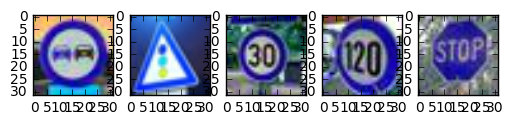

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

im1= cv2.imread("New_images/give_way1.jpg")
im2= cv2.imread("New_images/Signal_ahead.jpg",1)
im3= cv2.imread("New_images/Speed_Limit30.jpg",1)
im4= cv2.imread("New_images/speed-limit1220.jpg",1)
im5= cv2.imread("New_images/STOP_sign.jpg",1)

#Store the images in a variable
new_features = np.array((im1,im2,im3,im4,im5))

img, (pl1,pl2,pl3,pl4,pl5) = plt.subplots(1,5)
pl1.imshow(new_features[0], cmap="gray")
pl2.imshow(new_features[1], cmap="gray")
pl3.imshow(new_features[2], cmap="gray")
pl4.imshow(new_features[3], cmap="gray")
pl5.imshow(new_features[4], cmap="gray")

new_labels = [9,26,1,8,14]

### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#BGR2Gray

new_features = rgb2gray(new_features)

In [14]:
# Accuracy on test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
   

Test Accuracy = 0.921


### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_data_accuracy = evaluate(new_features, new_labels)
    print("New data accuracy = {:.3f}".format(new_data_accuracy))
    
    softmax = tf.nn.softmax(logits)
    probs = sess.run(softmax, feed_dict={x: new_features, y: new_labels})

New data accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_5_probs = sess.run(tf.nn.top_k(tf.constant(probs), k=5))
print(top_5_probs)

TopKV2(values=array([[  1.00000000e+00,   3.52339004e-20,   1.45334832e-24,
          5.63963268e-25,   1.73788307e-26],
       [  9.56660986e-01,   3.52478512e-02,   6.85297325e-03,
          1.17338984e-03,   6.45212422e-05],
       [  6.30962193e-01,   3.68663669e-01,   3.74083233e-04,
          1.32184837e-07,   1.53209478e-09],
       [  9.99999523e-01,   4.60427373e-07,   1.21799624e-13,
          9.26736918e-14,   3.16137395e-14],
       [  1.00000000e+00,   3.26499624e-14,   7.83611017e-15,
          6.25420938e-17,   2.02097739e-18]], dtype=float32), indices=array([[ 9,  2, 37, 40, 10],
       [26, 22, 39, 29, 24],
       [40,  7,  1,  2, 31],
       [ 8,  4,  1,  0, 31],
       [14, 34, 17, 38, 13]]))


Predicted Class: 9 | True Class: 9


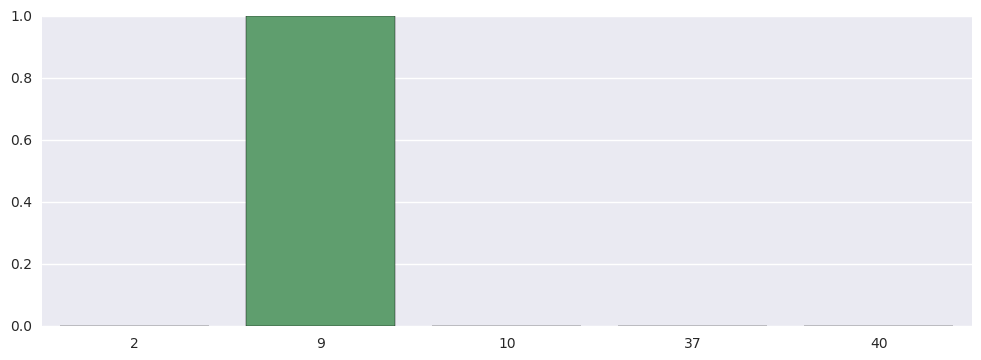

Predicted Class: 26 | True Class: 26


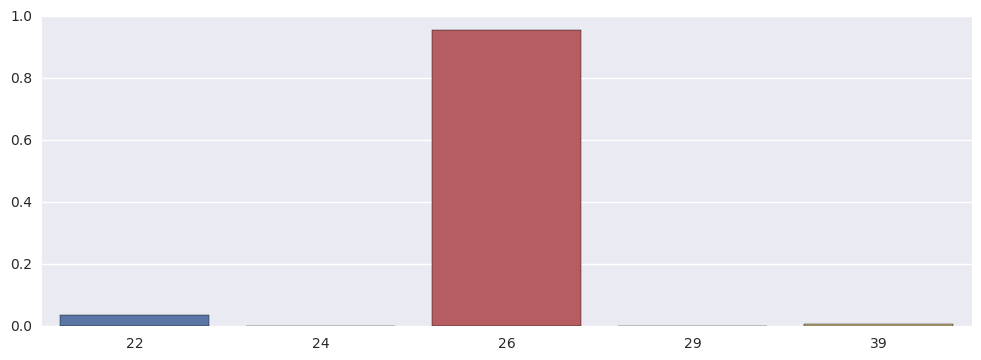

Predicted Class: 40 | True Class: 1


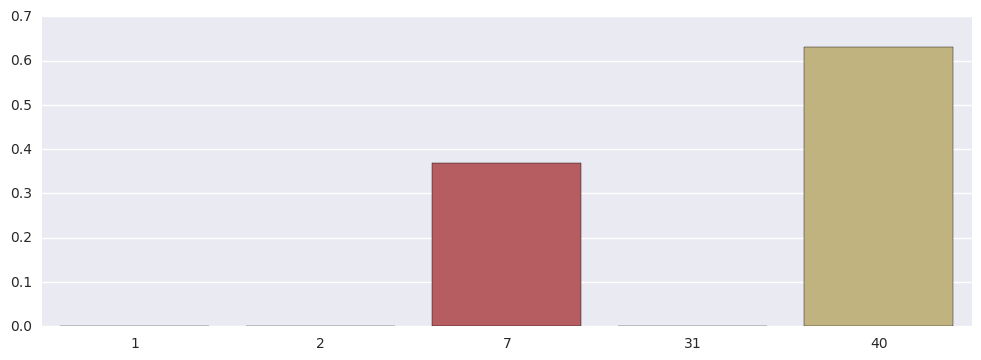

Predicted Class: 8 | True Class: 8


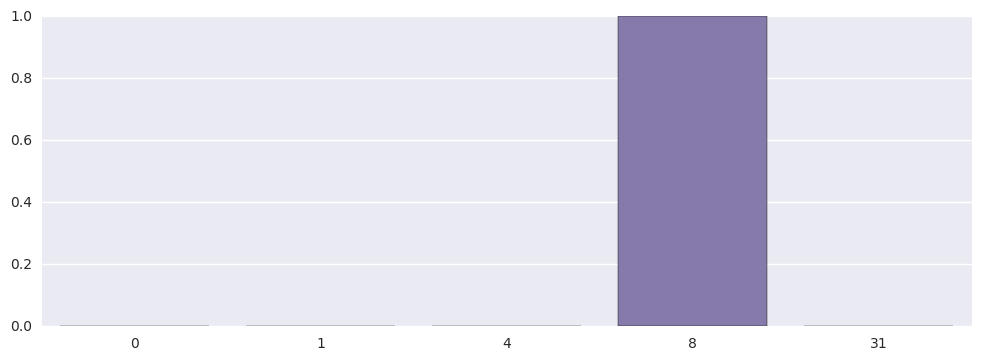

Predicted Class: 14 | True Class: 14


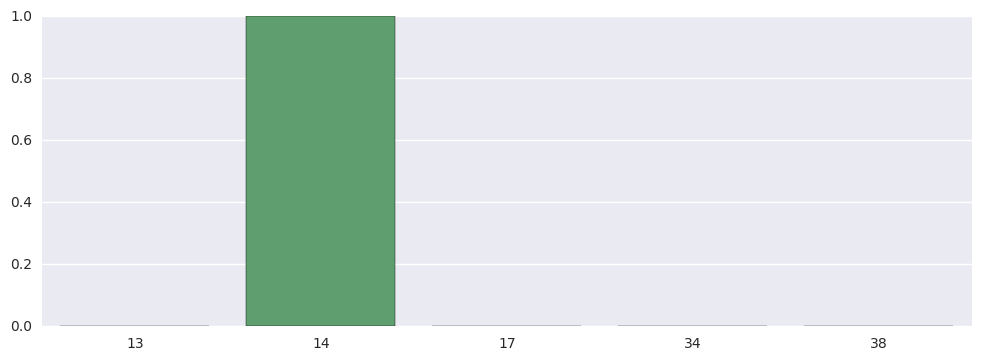

In [25]:
pred = [9,26,40,8,14]
import seaborn as sns
for i in range(5):
    print ("Predicted Class: {} | True Class: {}".format(pred[i],new_labels[i]))
    fig = plt.figure(figsize=(12,4))
    sns.barplot(x = top_5_probs[1][i], y=top_5_probs[0][i])
    plt.show()